# Imports

In [5]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

# 1. Data Reading

In [7]:
background = Table().read_table('Background.csv')   #reading the data background which contains info about students
grades = Table().read_table('Grades.csv')           #reading the data grades which contains scores of students

# 2. Columns & Rows reporting

In [8]:
background.show()   #it shows background table that importing from csv form

ID,gender,race/ethnicity,parental level of education,lunch,test preparation course
0,female,group B,bachelor's degree,standard,none
1,female,group C,some college,standard,completed
2,female,group B,master's degree,standard,none
3,male,group A,associate's degree,free/reduced,none
4,male,group C,some college,standard,none
5,female,group B,associate's degree,standard,none
6,female,group B,some college,standard,completed
7,male,group B,some college,free/reduced,none
8,male,group D,high school,free/reduced,completed
9,female,group B,high school,free/reduced,none


In [9]:
grades.show()   #it shows grades table that importing from csv form

ID,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
5,71,83,78
6,88,95,92
7,40,43,39
8,64,64,67
9,38,60,50


# 3. Average grade

In [10]:
grades = grades.with_column('Average Score',
                            grades.column('math score') * 40/100 +
                            grades.column('reading score') * 30/100 +
                            grades.column('writing score') * 30/100)   #gets the average score in order of the given conditions) 
grades.show()   #it shows background table that importing from csv form

ID,math score,reading score,writing score,Average Score
0,72,72,74,72.6
1,69,90,88,81
2,90,95,93,92.4
3,47,57,44,49.1
4,76,78,75,76.3
5,71,83,78,76.7
6,88,95,92,91.3
7,40,43,39,40.6
8,64,64,67,64.9
9,38,60,50,48.2


# 4. Sorting

In [11]:
grades.sort('Average Score', descending=True)   #sorting the average score in descending order

ID,math score,reading score,writing score,Average Score
962,100,100,100,100
916,100,100,100,100
458,100,100,100,100
114,99,100,100,99.6
712,98,100,99,98.9
625,100,97,99,98.8
179,97,100,100,98.8
165,96,100,100,98.4
149,100,100,93,97.9
685,94,99,100,97.3


In [12]:
above = grades.where('Average Score', are.above(94.9))   #limiting the average score in 95 and higher
above.show()   #show this limitations in table form

ID,math score,reading score,writing score,Average Score
114,99,100,100,99.6
149,100,100,93,97.9
165,96,100,100,98.4
179,97,100,100,98.8
451,100,92,97,96.7
458,100,100,100,100
546,92,100,97,95.9
566,92,100,100,96.8
594,92,100,99,96.5
625,100,97,99,98.8


In [13]:
above.num_rows   #reports the number of rows (how many students are get 95 or higher?)

20

# 5. Scatter Plots

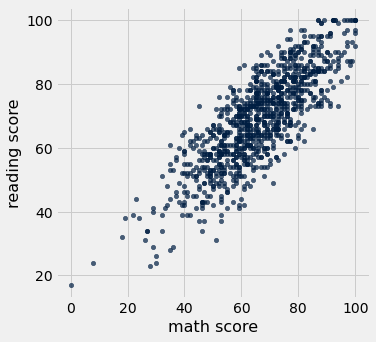

In [14]:
grades.scatter('math score', 'reading score')      #scatter plots between math and reading score

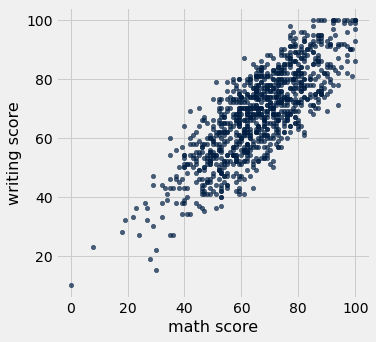

In [15]:
grades.scatter('math score', 'writing score')      #scatter plots between math and writing score

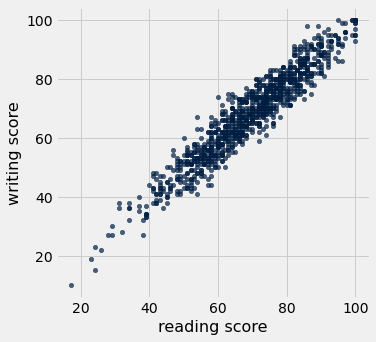

In [16]:
grades.scatter('reading score', 'writing score')   #scatter plots between reading and writing score

# 6. Gender Analysis

In [17]:
joined = background.join('ID', grades, 'ID')   #combining two tables grades and background
joined = joined.drop('race/ethnicity', 'parental level of education',
                     'lunch', 'test preparation course')   #it drop columns we dont want
joined = joined.select('gender', 'math score', 'reading score', 'writing score',
                       'Average Score').group('gender', np.average)   #it get average of columns in order of the gender column
joined

gender,math score average,reading score average,writing score average,Average Score average
female,63.6332,72.6081,72.4672,68.9759
male,68.7282,65.473,63.3112,66.1266


# 7. Letter Grade

In [18]:
def letter_grades(x):
    if x < 60:
        return 'F'
    elif 60 <= x < 70:
        return 'D'
    elif 70 <= x < 80:
        return 'C'
    elif 80 <= x < 90:
        return 'B'
    elif 90 <= x:
        return 'A'   #it grouping the scores to letter grades in order of the given intervals
    
letter = grades.with_column('Letter Grade',
                            grades.apply(letter_grades,
                                         'Average Score'))   #it create new column and apply the letter grades to average score
letter

ID,math score,reading score,writing score,Average Score,Letter Grade
0,72,72,74,72.6,C
1,69,90,88,81,B
2,90,95,93,92.4,A
3,47,57,44,49.1,F
4,76,78,75,76.3,C
5,71,83,78,76.7,C
6,88,95,92,91.3,A
7,40,43,39,40.6,F
8,64,64,67,64.9,D
9,38,60,50,48.2,F


# 8. Race/Ethnic Group Analysis

In [19]:
race = background.join('ID', letter, 'ID')             #combining two tables grades and background
race = race.select('race/ethnicity', 'Letter Grade')   #it select the choosen columns
race.group(['race/ethnicity', 'Letter Grade'])         #it counts the letter grade with race
race.pivot('Letter Grade', 'race/ethnicity')           #cross-classifies for reading the table more organized

race/ethnicity,A,B,C,D,F
group A,4,7,14,24,40
group B,7,28,36,59,60
group C,12,41,85,83,98
group D,12,40,76,68,66
group E,14,31,43,28,24


# 9. Failed Math, More than 70 Reading

In [20]:
failed_math = grades.where('math score', are.below(60))   #first we finding students failed in math (getting less than 60)
failed_math.where('reading score', are.above(70))         #then we find students that got at least 70 in writing (from first student group)

ID,math score,reading score,writing score,Average Score
32,56,72,65,63.5
41,58,73,68,65.5
48,57,74,76,67.8
108,52,76,70,64.6
167,58,76,78,69.4
308,53,71,67,62.6
354,59,71,70,65.9
371,45,73,70,60.9
387,57,78,67,66.3
414,51,72,79,65.7


# 10. Course Preparation Distributions

In [21]:
preparation = background.join('ID', letter, 'ID')   #combining two tables grades and background
preparation = preparation.select('test preparation course',
                                 'math score',
                                 'reading score',
                                 'writing score',
                                 'Average Score')   #selecting columns from the table
none = preparation.where('test preparation course', are.equal_to('none'))             #seperating student group (no participation)
completed = preparation.where('test preparation course', are.equal_to('completed'))   #seperating student group (complete participation )
my_bins = make_array(0, 50, 60, 65, 70, 75, 80, 85, 90, 95, 100)   #making bin size in order of the given intervals

In [22]:
n = none.bin('math score',
         'reading score',
         'writing score',
         'Average Score',
         bins = my_bins)   #it shows the number of student that no participation for each score and each interval
n.show()

bin,math score count,reading score count,writing score count,Average Score count
0,107,74,98,90
50,129,124,133,135
60,88,87,77,91
65,85,78,83,87
70,72,93,93,80
75,56,67,55,68
80,50,48,52,39
85,29,35,22,37
90,17,22,16,8
95,9,14,13,7


In [23]:
c = completed.bin('math score',
              'reading score',
              'writing score',
              'Average Score',
              bins = my_bins)   #it shows the number of student that completed participation for each score and each interval
c.show()

bin,math score count,reading score count,writing score count,Average Score count
0,28,16,16,21
50,59,40,34,42
60,36,32,28,28
65,59,36,42,56
70,42,50,46,57
75,46,54,60,49
80,26,51,48,44
85,30,36,35,27
90,17,20,28,21
95,15,23,21,13


# 11. Education Level

In [24]:
combined = background.join('ID', letter, 'ID')
combined = combined.drop('ID', 'gender', 'race/ethnicity', 'lunch', 'test preparation course', 'math score',
                         'reading score', 'writing score', 'Average Score')    #combining two tables grades and background
combined

parental level of education,Letter Grade
bachelor's degree,C
some college,B
master's degree,A
associate's degree,F
some college,C
associate's degree,C
some college,A
some college,F
high school,D
high school,F


# 12. Gender/Ethnic Grid

In [25]:
parental = background.join('ID', letter, 'ID')   #combining two tables grades and background
parental = parental.drop('ID', 'parental level of education', 'lunch', 'test preparation course', 'math score',
                         'reading score', 'writing score', 'Average Score')   #it drop columns we dont want
grade_A = parental.where('Letter Grade', are.below('B'))      #limiting the letter grade just 'A'
grade_A.group(['gender', 'race/ethnicity', 'Letter Grade'])   #counting students get A in order of the gender and race
grade_A.pivot('gender', 'race/ethnicity')                     #it shows these students in grid format

race/ethnicity,female,male
group A,1,3
group B,5,2
group C,6,6
group D,11,1
group E,11,3
